# Taylor problem 1.50

This problem attacks the "oscillating skateboard" problem described in Example 1.2 of Taylor.  A Newton's 2nd law analysis leads to the differential equation for the angle $\phi$ in radians:

$
\begin{align}
  \ddot\phi = -\frac{g}{R}\sin\phi
  \;.
\end{align}
$

This is a 2nd order, *nonlinear* differential equation.  We note it is the same equation describing the motion of a simple (undamped, not driven) pendulum.

Problem 1.50 has us solving this equation numerically for particular initial conditions and comparing the plots to the approximate solution based on the small angle approximation for $\sin\phi$.  We'll build up code to find this solution and plot it in steps to illustrate how a notebook evolves.  We don't create the polished version at once!

**Your goal for problem 1.51: Modify the relevant part of this notebook to produce the required figure, print it out, and turn it in with your homework.**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})


We'll define the right-hand side (rhs) of the ordinary differential equations (ODE) using the standard form from the Python basics notebook:

$$\begin{align}
   \frac{d}{dt}\left(\begin{array}{c}
                          \phi \\
                          \dot\phi
                      \end{array}\right)
               = \left(\begin{array}{c}
                          \dot\phi \\
                          -g \sin(\phi)
                       \end{array}\right)
\end{align}$$

In [3]:
def ode_rhs_exact(u_vec, t, *params):
    """ 
    Right-hand side (rhs) of the differential equation, with 
    u_vec = [\phi, \dot\phi] and params = [g, R].  Returns the list of
    d(u_vec)/dt, as prescribed by the differential equation.
    
    """
    phi, phidot = u_vec  # extract phi and phidot from the passed vector
    g, R = params  # extract g and R from the passed parameters
    return [phidot, -g*np.sin(phi)/R]

In [4]:
# parameters
g = 9.8  # in mks units
R = 5    # radius in meters

# absolute and relative tolerances for ode solver
abserr = 1.0e-8
relerr = 1.0e-6

# initial conditions for [phi, phidot]
phi0 = np.pi/180 * 20.  # convert initial phi to radians
u0_vec = [phi0, 0.]

t_max = 15.  # integration time
t_pts = np.arange(0, t_max, 0.01)  # array of time points, spaced 0.01

# Integrate the differential equation and read off phi, phidot (note T!)
phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T

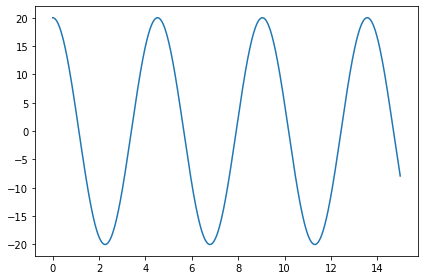

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_pts, 180./np.pi * phi)
fig.tight_layout()  # make the spacing of subplots nicer

**Does the plot make sense for $\phi$?  E.g., does it start at the correct angle? Does it have the behavior you expect (e.g., periodic with constant amplitude)?**

Now let's put this into a function:

In [6]:
def solve_for_phi(phi0, phidot0=0, t_min=0., t_max=1., g=9.8, R=5.):
    """
    Solve the differential equation for the skateboard Example 1.2 in Taylor.
    The result for t, \phi(t) and \dot\phi(t) are returned for a grid with
    t_min < t < t_max and a hardwired (for now) spacing of 0.01 seconds.
    The ODE solver is odeint from scipy, with specified tolerances. 
    Units are mks and angles are in radians.
    """

    # absolute and relative tolerances for ode solver
    abserr = 1.0e-8
    relerr = 1.0e-6

    # initial conditions for [phi, phidot]
    u0_vec = [phi0, phidot0]

    t_pts = np.arange(t_min, t_max, 0.01)

    # Integrate the differential equation
    phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T
    
    return t_pts, phi, phidot

Check that it works (gives the previous result).

In [7]:
phi0 = np.pi/180 * 90.  # convert initial phi to radians
t_pts, phi, phidot = solve_for_phi(phi0, t_max=15.)

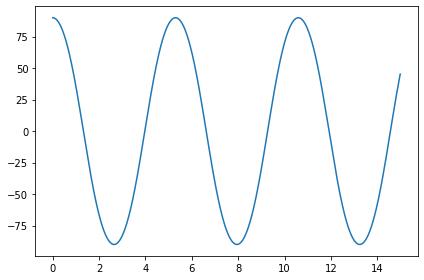

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_pts, 180./np.pi * phi)
fig.tight_layout()  # make the spacing of subplots nicer


Ok, now we need an ode function for the small angle approximation.  It's very easy now to copy and modify our other function!

In [9]:
def ode_rhs_small_angle(u_vec, t, *params):
    """ 
    Right-hand side (rhs) of the differential equation, with 
    u_vec = [\phi, \dot\phi] and params = [g, R].  Returns the list of
    d(u_vec)/dt, as prescribed by the differential equation.
    
    """
    phi, phidot = u_vec  # We don't actually use x or y here, but could!
    g, R = params
    return [phidot, -g*phi/R]

And we can put them together into one solver function:

In [10]:
def solve_for_phi_all(phi0, phidot0=0, t_min=0., t_max=1., g=9.8, R=5.):
    """
    Solve the differential equation for the skateboard Example 1.2 in Taylor
    using the exact equation and the small angle approximation.
    The result for t, \phi(t) and \dot\phi(t) are returned for a grid with
    t_min < t < t_max and a hardwired (for now) spacing of 0.01 seconds.
    The ODE solver is odeint from scipy, with specified tolerances. 
    Units are mks and angles are in radians.
    """

    # absolute and relative tolerances for ode solver
    abserr = 1.0e-8
    relerr = 1.0e-6

    # initial conditions for [phi, phidot]
    u0_vec = [phi0, phidot0]

    t_pts = np.arange(t_min, t_max, 0.01)

    # Integrate the differential equations
    phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T
    phi_sa, phidot_sa = odeint(ode_rhs_small_angle, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T
    
    return t_pts, phi, phidot, phi_sa, phidot_sa

Always try it out!

In [11]:
phi0 = np.pi/180 * 90.
t_pts, phi, phidot, phi_sa, phidot_sa = solve_for_phi_all(phi0, t_max=15.)


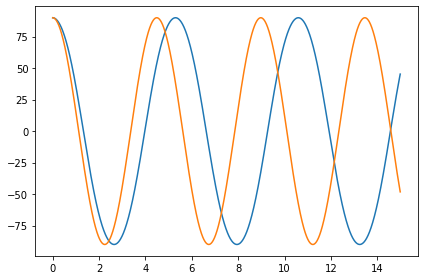

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_pts, 180./np.pi * phi)
ax.plot(t_pts, 180./np.pi * phi_sa)
fig.tight_layout()  # make the spacing of subplots nicer


This is actually the plot that is requested, so we could analyze it at this stage, but instead let's improve the plot and see how to save it.

### Ok, now for some more systematic plotting

Here we see examples of applying limits to the x and y axes as well as labels and a title.

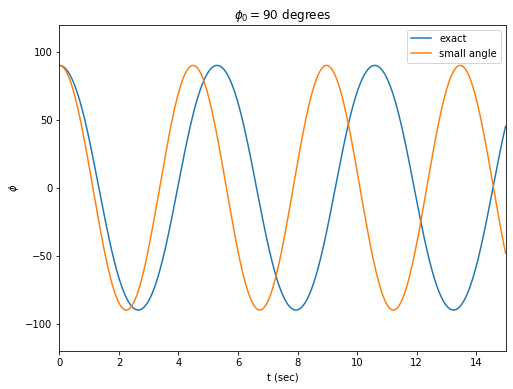

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0.,15.)
ax.set_ylim(-120.,120.)
ax.set_xlabel('t (sec)')
ax.set_ylabel(r'$\phi$')
ax.set_title(r'$\phi_0 = 90$ degrees')
line_exact, = ax.plot(t_pts, 180./np.pi * phi, label='exact')
line_sa, = ax.plot(t_pts, 180./np.pi * phi_sa, label='small angle')
ax.legend(loc='upper right')

# save the figure
fig.savefig('Taylor_prob_1.51.png', bbox_inches='tight')

### Bonus: repeat with widgets!

This actually generalizes problems 1.50 and 1.51 so that you can examine any angle in between.  Use it to check your figure for 1.51.

In [14]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

def rad_to_deg(theta_rad):
    """Take as input an angle in radians and return it in degrees."""
    return 180./np.pi * theta_rad

def deg_to_rad(theta_deg):
    """Take as input an angle in degrees and return it in radians."""
    return np.pi/180. * theta_deg


In [15]:
def plot_exact_and_small_angle(phi0_deg=0):
    phi0_rad = deg_to_rad(phi0_deg)
    t_pts, phi_rad, phidot, phi_sa_rad, phidot_sa = \
         solve_for_phi_all(phi0_rad, t_max=15.)
    phi_deg = rad_to_deg(phi_rad)
    phi_sa_deg = rad_to_deg(phi_sa_rad)
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    line_exact, = ax.plot(t_pts, phi_deg, label='exact')
    line_sa, = ax.plot(t_pts, phi_sa_deg, label='small angle')
    ax.legend()
    ax.set_xlim(0.,15.)
    #ax.set_ylim(-90.,90.)
    ax.set_xlabel('t (sec)')
    ax.set_ylabel(r'$\phi$')
    ax.set_title(fr'$\phi_0 = {phi0_deg:.0f}$')
    plt.show()


In [16]:
interact(plot_exact_and_small_angle, phi0_deg=(0.,90.));

interactive(children=(FloatSlider(value=0.0, description='phi0_deg', max=90.0), Output()), _dom_classes=('widg…

In [17]:
# to avoid the jiggling and do some formatting
phi0_deg_widget = widgets.FloatSlider(min=0., max=120.0, step=0.1, value=0.,
                                     description=r'$\phi_0$ (degrees)',
                                     readout_format='.0f',
                                     continuous_update=False
                                    )
interact(plot_exact_and_small_angle, phi0_deg=phi0_deg_widget);

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi_0$ (degrees)', max=1…